Optimization terminated successfully.
         Current function value: -0.083612
         Iterations: 26
         Function evaluations: 52
1.0636250000000012
[1.05787543] [1.05787543]


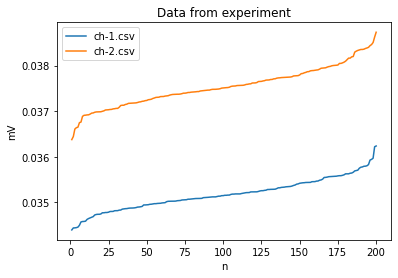

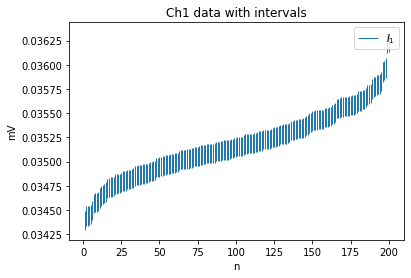

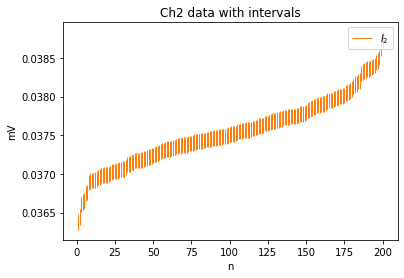

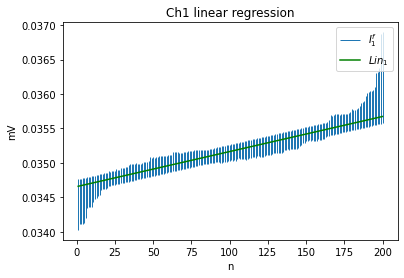

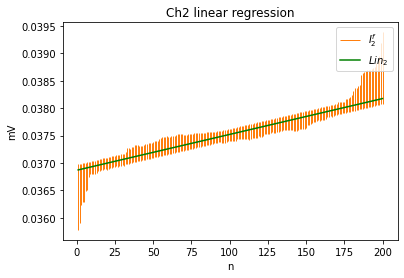

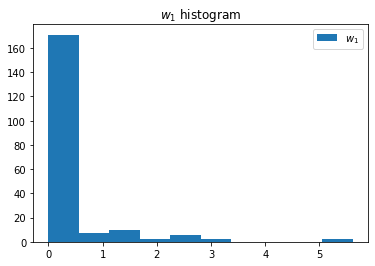

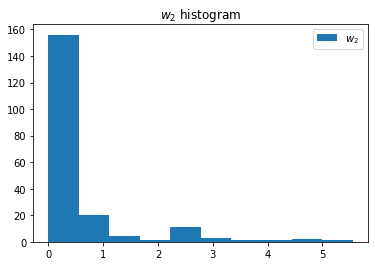

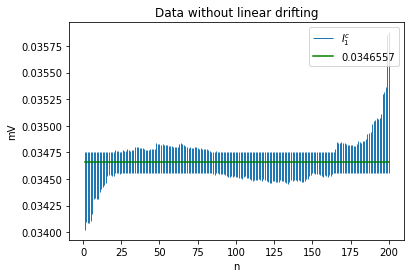

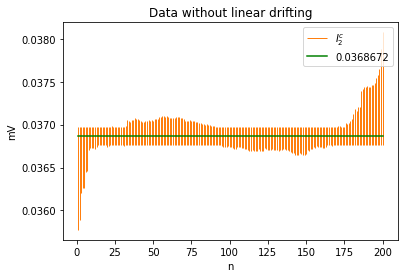

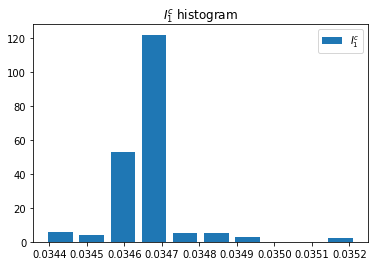

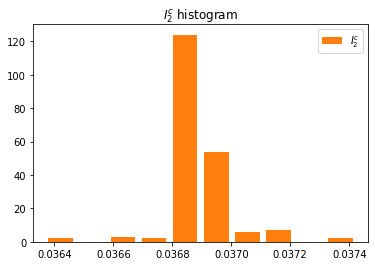

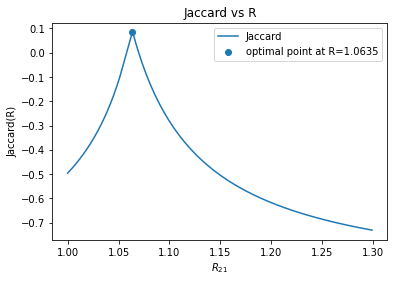

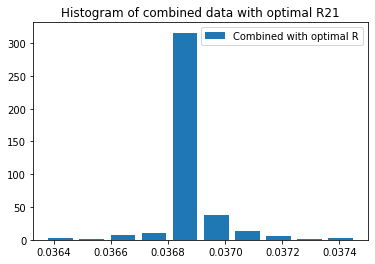

In [10]:
# used octave.m to build A and B
import csv
import math
import scipy.optimize as opt
import matplotlib.pyplot as plt


EPS = 1e-4

def load_csv(filename):
    data1 = [] 
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile, delimiter = ';')
        for row in spamreader:
            data1.append([float(row[0]), float(row[0])])
    return data1

def load_octave(filename):
    A = 0
    B = 0
    w = []
    with open(filename) as f:
        A, B = [float(t) for t in f.readline().split()]
        for line in f.readlines():
            w.append(float(line))
    return A, B, w

def plot_interval(y, x, color='b', label1=""):
    if (x == 1):
        plt.vlines(x, y[0], y[1], color, lw=1, label = label1)
    else:
        plt.vlines(x, y[0], y[1], color, lw=1)

def plot_interval_hist(x, color='b', label1=""):
    min_value = x[0][0]
    max_value = x[-1][1]
    step = 0.0001
    bins = [min_value + step * i for i in range(math.ceil((max_value - min_value) / step))]
    hist = [(t[1] + t[0]) / 2 for t in x]
    cur_value = 0
    #for el in combined_values:
    #    if left_values.count(el) > 0:
    #        cur_value += 1
    #    if right_values.count(el) > 0:
    #        cur_value -= 1
    #    hist = hist + [el] * cur_value

    plt.hist(hist, color = color, label = label1, rwidth=0.8)

if __name__ == "__main__":
    data1 = load_csv('data/ch-1.csv')
    data2 = load_csv('data/ch-2.csv')
    data1_A, data1_B, data1_w = load_octave('data/ch1.txt')
    data2_A, data2_B, data2_w = load_octave('data/ch2.txt')
    data_n = [t for t in range(1, len(data1) + 1)]
    #plot data together 
    plt.plot(data_n, [data1[i][0] for i in range(len(data1))], label='ch-1.csv')
    plt.plot(data_n, [data2[i][0] for i in range(len(data2))], label='ch-2.csv')
    plt.legend()
    plt.title('Data from experiment')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/input_data.png")
    plt.figure()
    
    data1 = [[data1[i][0] - EPS, data1[i][1] + EPS] for i in range(len(data1))]
    data2 = [[data2[i][0] - EPS, data2[i][1] + EPS] for i in range(len(data2))]
        
    # plot first
    for i in range(len(data1)):
       plot_interval(data1[i], data_n[i], 'C0', "$I_1$")

    plt.legend()
    plt.title('Ch1 data with intervals')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_interval.png")
    plt.figure()

    # plot second
    for i in range(len(data2)):
       plot_interval(data2[i], data_n[i], 'C1', "$I_2$")
       
    plt.legend()
    plt.title('Ch2 data with intervals')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data2_interval.png")
    plt.figure()

    data1 = [[data1[i][0] - data1_w[i] * EPS, data1[i][1] + data1_w[i] * EPS] for i in range(len(data1))]
    data2 = [[data2[i][0] - data2_w[i] * EPS, data2[i][1] + data2_w[i] * EPS] for i in range(len(data2))]

    # plot first
    for i in range(len(data1)):
       plot_interval(data1[i], data_n[i], 'C0', "$I_1^f$")

    plt.plot([data_n[0], data_n[-1]], [data_n[0] * data1_B + data1_A, data_n[-1] * data1_B + data1_A], color='green', label = "$Lin_1$")

    plt.legend()
    plt.title('Ch1 linear regression')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_fixed.png")
    plt.figure()

    # plot second
    for i in range(len(data2)):
       plot_interval(data2[i], data_n[i], 'C1', "$I_2^f$")

    plt.plot([data_n[0], data_n[-1]], [data_n[0] * data2_B + data2_A, data_n[-1] * data2_B + data2_A], color='green', label = "$Lin_2$")
       
    plt.legend()
    plt.title('Ch2 linear regression')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data2_fixed.png")
    plt.figure()
    
    #plot histogram
    plt.hist(data1_w, label="$w_1$")
    plt.legend()
    plt.title('$w_1$ histogram')
    plt.savefig("report/pics/w1_hist.png")
    plt.figure()
    
    #plot histogram
    plt.hist(data2_w, label="$w_2$")
    plt.legend()
    plt.title('$w_2$ histogram')
    plt.savefig("report/pics/w2_hist.png")
    plt.figure()
    
    data1_fixed = [[data1[i][0] - data1_B * data_n[i], data1[i][1] - data1_B * data_n[i]] for i in range(len(data1))]
    data2_fixed = [[data2[i][0] - data2_B * data_n[i], data2[i][1] - data2_B * data_n[i]] for i in range(len(data2))]
    # plot first
    for i in range(len(data1_fixed)):
       plot_interval(data1_fixed[i], data_n[i], "C0", "$I_1^c$")
       
    plt.plot([data_n[0], data_n[-1]], [data1_A, data1_A], color='green', label=str(data1_A))
    plt.legend()
    plt.title('Data without linear drifting')
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.savefig("report/pics/data1_const.png")
    plt.figure()
    # plot second
    for i in range(len(data2_fixed)):
       plot_interval(data2_fixed[i], data_n[i], "C1", "$I_2^c$")
       
    plt.plot([data_n[0], data_n[-1]], [data2_A, data2_A], color='green', label=str(data2_A))
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('mV')
    plt.title('Data without linear drifting')
    plt.savefig("report/pics/data2_const.png")
    plt.figure()

    # plot first histogram
    plot_interval_hist(data1_fixed, "C0", "$I_1^c$")       
    plt.legend()
    plt.title('$I_1^c$ histogram')
    plt.savefig("report/pics/data1_hist_const.png")
    plt.figure()

    # plot second histogram
    plot_interval_hist(data2_fixed, "C1", "$I_2^c$")       
    plt.legend()
    plt.title('$I_2^c$ histogram')
    plt.savefig("report/pics/data2_hist_const.png")
    plt.figure()

    R_interval = [0.001 * i + 1 for i in range(300)]
    Jaccars = []

    def countJakkar(R):
        data1_new = [[data1_fixed[i][0] * R, data1_fixed[i][1] * R] for i in range(len(data1_fixed))]
        all_data = data1_new + data2_fixed
        min_inc = list(all_data[0])
        max_inc = list(all_data[0])
        for interval in all_data:
            min_inc[0] = max(min_inc[0], interval[0])
            min_inc[1] = min(min_inc[1], interval[1])
            max_inc[0] = min(max_inc[0], interval[0])
            max_inc[1] = max(max_inc[1], interval[1])
        JK = (min_inc[1] - min_inc[0]) / (max_inc[1] - max_inc[0])
        return JK

    
    for R in R_interval:
        Jaccars.append(countJakkar(R))
        
    optimal_x = opt.fmin(lambda x: -countJakkar(x), 0)     
    print(optimal_x[0])    

    min1 = opt.root(countJakkar, 1)     
    max1 = opt.root(countJakkar, 2)     
    print(min1.x, max1.x)    

        
    plt.plot(R_interval, Jaccars, label="Jaccard", zorder=1)
    plt.scatter(optimal_x[0], countJakkar(optimal_x[0]), label="optimal point at R=" + str(1.0635))    
    plt.legend()
    plt.xlabel('$R_{21}$')
    plt.ylabel('Jaccard(R)')
    plt.title('Jaccard vs R')
    plt.savefig("report/pics/jakkar.png")
    plt.figure()
    
    data1_new = [[data1_fixed[i][0] * optimal_x[0], data1_fixed[i][1] * optimal_x[0]] for i in range(len(data1_fixed))]
    all_data = data1_new + data2_fixed
    plot_interval_hist(all_data, "C0", "Combined with optimal R")
    plt.legend()
    plt.title('Histogram of combined data with optimal R21')
    plt.savefig("report/pics/jakkar_combined_hist.png")

    #plt.show()